In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import io
import base64

Matplotlib is building the font cache; this may take a moment.


In [2]:

# Load the Wine Dataset
print("Step 1: Load Wine Dataset and Perform Basic Data Exploration")
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

print("\n--- Feature Details (X.info()) ---")
X.info()

print("\n--- Descriptive Statistics (X.describe()) ---")
print(X.describe())

print("\n--- Class Distribution (y.value_counts()) ---")
print(y.value_counts())

Step 1: Load Wine Dataset and Perform Basic Data Exploration

--- Feature Details (X.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_win

In [3]:
# It's important to scale the data for distance-based algorithms like KNN and RNN
# MinMaxScaler scales features to a given range, typically 0 to 1.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=wine.feature_names) # Convert back to DataFrame for consistency

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify=y)
print(f"\nDataset split into training (X_train shape: {X_train.shape}, y_train shape: {y_train.shape})")
print(f"and testing (X_test shape: {X_test.shape}, y_test shape: {y_test.shape}) sets.")


# Step 2: Implement K-Nearest Neighbors (KNN)
print("\nStep 2: Implementing K-Nearest Neighbors (KNN)")
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    # Initialize KNN Classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Train the model using the training set
    knn_classifier.fit(X_train, y_train)
    # Predict on the test set
    y_pred_knn = knn_classifier.predict(X_test)
    # Calculate accuracy
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    knn_accuracies.append(accuracy_knn)
    print(f"KNN (k={k}): Accuracy = {accuracy_knn:.4f}")


Dataset split into training (X_train shape: (142, 13), y_train shape: (142,))
and testing (X_test shape: (36, 13), y_test shape: (36,)) sets.

Step 2: Implementing K-Nearest Neighbors (KNN)
KNN (k=1): Accuracy = 0.9722
KNN (k=5): Accuracy = 1.0000
KNN (k=11): Accuracy = 0.9722
KNN (k=15): Accuracy = 1.0000
KNN (k=21): Accuracy = 1.0000


In [4]:
# Step 3: Implement Radius Neighbors (RNN)
print("\nStep 3: Implementing Radius Neighbors (RNN)")
# Note: For RadiusNeighborsClassifier, the 'radius' parameter is crucial.
# It defines the maximum distance for points to be considered neighbors.
# The `outlier_label` can be used to label points that have no neighbors within the radius.
# Setting it to 'most_frequent' or a specific label might be useful.
# Here, we will use default which means predictions for such points will be based on the labels of the majority of the neighbors within the specified radius.
radius_values = [0.35, 0.40, 0.45, 0.50, 0.55, 0.60] # Adjusted radius values to fit scaled data (0-1 range)
rnn_accuracies = []

for r in radius_values:
    # Initialize RNN Classifier with the current radius value
    # You might want to experiment with `outlier_label` or `weights`
    rnn_classifier = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    # Train the model using the training set
    rnn_classifier.fit(X_train, y_train)
    # Predict on the test set
    y_pred_rnn = rnn_classifier.predict(X_test)
    # Calculate accuracy
    accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
    rnn_accuracies.append(accuracy_rnn)
    print(f"RNN (radius={r:.2f}): Accuracy = {accuracy_rnn:.4f}")

print("\n--- Summary of Accuracies ---")
print("KNN Accuracies:", knn_accuracies)
print("RNN Accuracies:", rnn_accuracies)


Step 3: Implementing Radius Neighbors (RNN)
RNN (radius=0.35): Accuracy = 0.6944
RNN (radius=0.40): Accuracy = 0.8889
RNN (radius=0.45): Accuracy = 1.0000
RNN (radius=0.50): Accuracy = 1.0000
RNN (radius=0.55): Accuracy = 0.9722
RNN (radius=0.60): Accuracy = 0.9722

--- Summary of Accuracies ---
KNN Accuracies: [0.9722222222222222, 1.0, 0.9722222222222222, 1.0, 1.0]
RNN Accuracies: [0.6944444444444444, 0.8888888888888888, 1.0, 1.0, 0.9722222222222222, 0.9722222222222222]



Step 4: Generating plots for visualization...


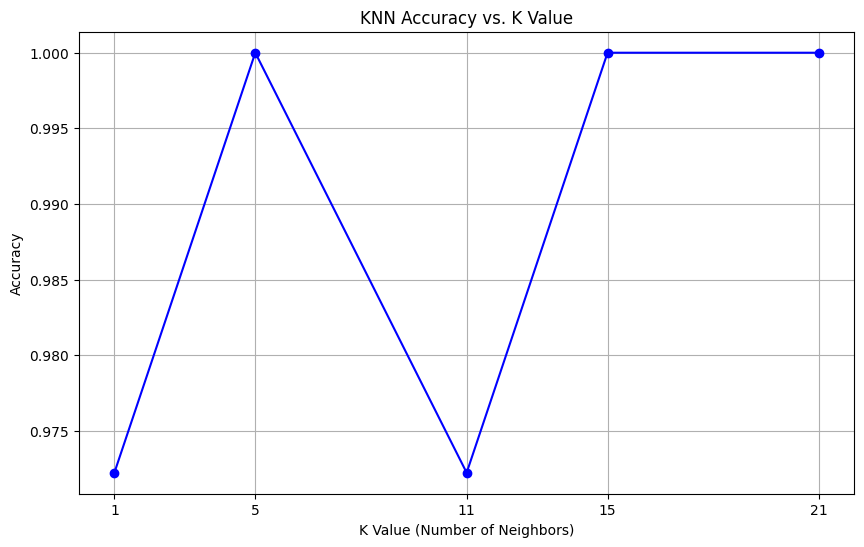

In [5]:



# Step 4: Visualize and Compare Results
print("\nStep 4: Generating plots for visualization...")

# Plotting KNN Accuracy Trends
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs. K Value')
plt.xlabel('K Value (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
# Display the plot directly in Jupyter
plt.show()
plt.close() # Close the plot to free memory

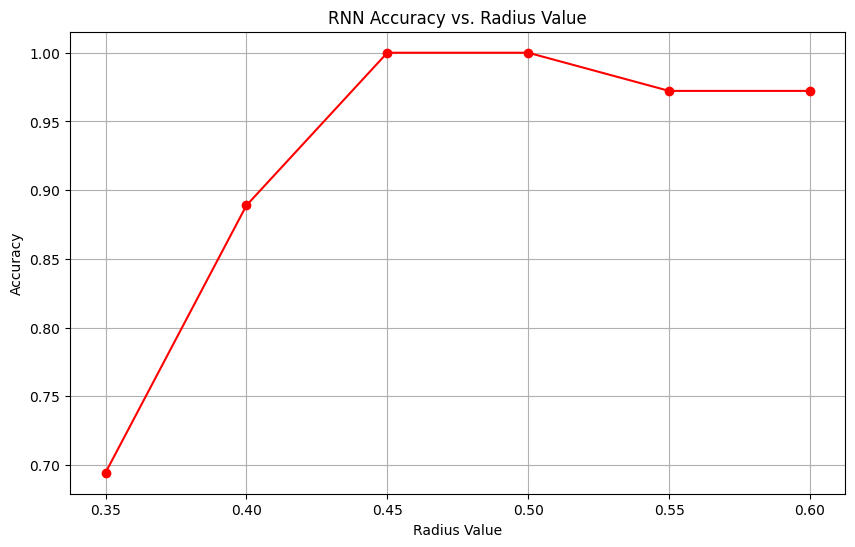

In [6]:



# Plotting RNN Accuracy Trends
plt.figure(figsize=(10, 6))
plt.plot(radius_values, rnn_accuracies, marker='o', linestyle='-', color='red')
plt.title('RNN Accuracy vs. Radius Value')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.xticks(radius_values)
plt.grid(True)
# Display the plot directly in Jupyter
plt.show()
plt.close() # Close the plot to free memory

# The base64 encoding and printing steps are removed for direct Jupyter display.
